## Clustering Travel Agency Booking Data

In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/travel.csv')
df.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,1,1,12812,5,0,1,2,50,368,83


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 100000 non-null  int64  
 1   date_time                  100000 non-null  object 
 2   site_name                  100000 non-null  int64  
 3   posa_continent             100000 non-null  int64  
 4   user_location_country      100000 non-null  int64  
 5   user_location_region       100000 non-null  int64  
 6   user_location_city         100000 non-null  int64  
 7   orig_destination_distance  63915 non-null   float64
 8   user_id                    100000 non-null  int64  
 9   is_mobile                  100000 non-null  int64  
 10  is_package                 100000 non-null  int64  
 11  channel                    100000 non-null  int64  
 12  srch_ci                    99878 non-null   object 
 13  srch_co                    998

In [4]:
df.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.882530e+07,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,0.133770,0.248140,...,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,1.086183e+07,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,0.340407,0.431936,...,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,...,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.448967e+06,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,0.000000,0.000000,...,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881212e+07,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,...,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825307e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,0.000000,0.000000,...,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,...,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


In [5]:
df.isnull().sum()

Unnamed: 0                       0
date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    36085
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        122
srch_co                        122
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

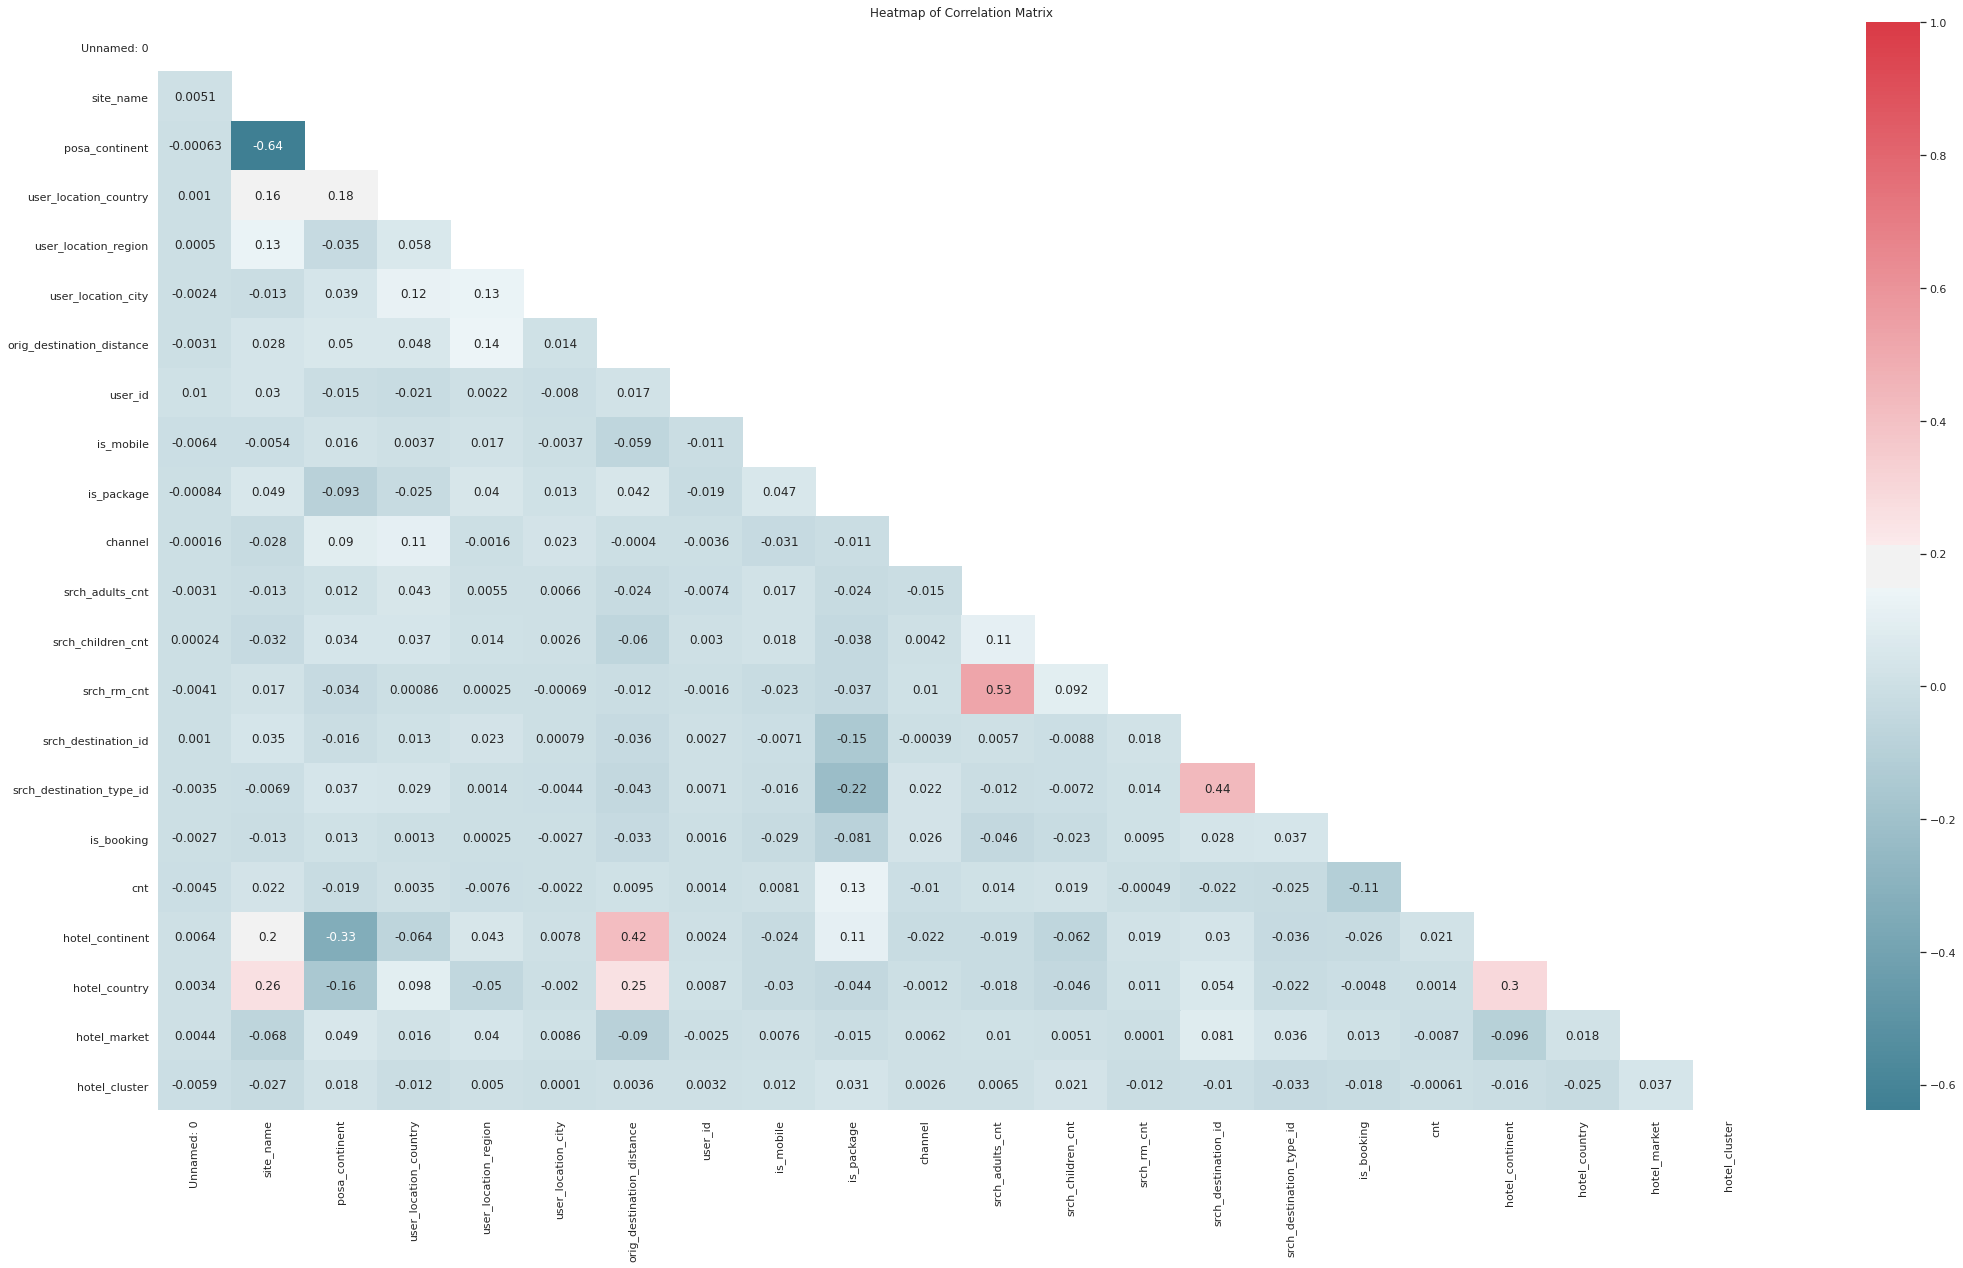

In [6]:
# Correlation heat map
sns.set(style='white')
corr = df.corr()

# Mask redundant half
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(36,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True)
plt.title('Heatmap of Correlation Matrix')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfd90a4ed0>,
      dtype=object)

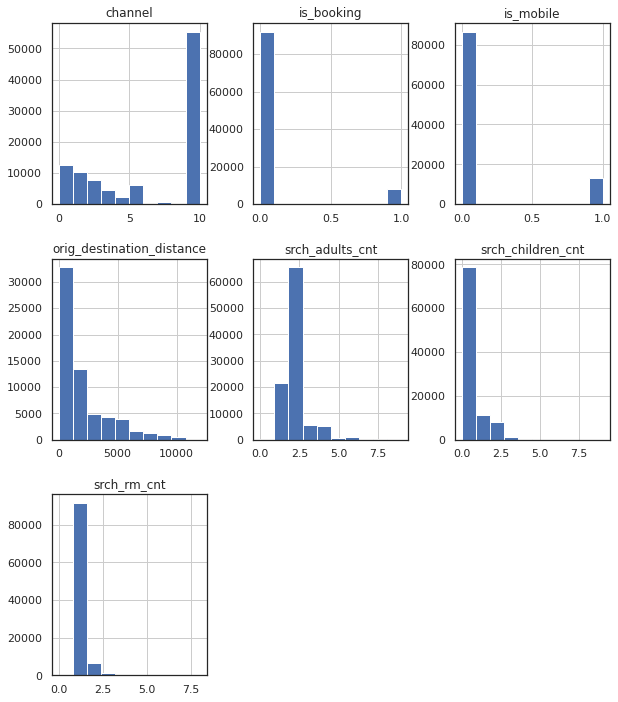

In [7]:
# Show histograms of some of the features
df[['channel', 'is_booking', 'is_mobile', 'orig_destination_distance', 'srch_rm_cnt', 'srch_adults_cnt', 'srch_children_cnt']].hist(figsize=(10,12))

In [8]:
# Show distribution of booking attempts
(df.groupby('user_id')['is_booking'].agg(['count'])
     .rename(columns={'count': 'attempts'}).reset_index()
     .groupby('attempts')['user_id'].agg(['count'])
     .rename(columns={'count': 'num_of_bookings'}))

,num_of_bookings
attempts,
1,79189
2,8423
3,1065
4,161
5,24
6,1


In [9]:
# Bookings made per user
booking_count_per_user = df.groupby('user_id')['is_booking'].agg(['count']).reset_index()
booking_count_per_user.head()

,user_id,count
0,14,1
1,38,1
2,40,1
3,156,2
4,160,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfd6d45250>]],
      dtype=object)

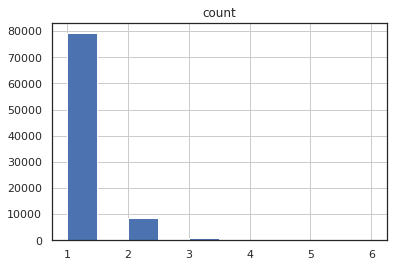

In [10]:
# Histogram of bookings made per user
booking_count_per_user[['count']].hist(figsize=(6,4))

In [11]:
# Merge user id booking count with dataframe
df = df.merge(df.groupby('user_id')['is_booking'].agg(['count']).reset_index())
df.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,1,8286,1,0,1,0,63,1258,68,2
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,...,1,8286,1,0,1,0,63,1258,14,2
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,1,1842,3,0,1,2,198,786,37,1
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,1,8746,1,0,1,6,105,29,22,1
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,1,6210,3,1,1,2,198,1234,42,2


In [12]:
# Crosstab to group counts
pd.crosstab(df['srch_adults_cnt'], df['srch_children_cnt'])

srch_children_cnt,0,1,2,3,4,5,6,7,8,9
srch_adults_cnt,,,,,,,,,,
0,174,2,3,2,0,0,0,0,0,0
1,18749,2137,523,117,11,1,9,1,2,0
2,50736,7093,6529,972,208,14,7,1,0,0
3,3645,1131,469,131,27,5,2,2,0,2
4,3933,690,494,77,83,9,4,0,0,0
5,535,131,41,20,6,4,2,0,0,0
6,669,73,53,28,18,13,7,0,0,0
7,99,20,5,8,6,3,0,0,0,0
8,183,12,13,2,6,1,3,2,2,1


In [13]:
# Sum the counts of travellers and drop the rows that equal to zero
df.drop(df[df['srch_adults_cnt'] + df['srch_children_cnt']==0].index).head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,1,8286,1,0,1,0,63,1258,68,2
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,...,1,8286,1,0,1,0,63,1258,14,2
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,1,1842,3,0,1,2,198,786,37,1
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,1,8746,1,0,1,6,105,29,22,1
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,1,6210,3,1,1,2,198,1234,42,2


In [14]:
# Correct date time feature types
df['srch_co'] = pd.to_datetime(df['srch_co'])
df['srch_ci'] = pd.to_datetime(df['srch_ci'])
df['date_time'] = pd.to_datetime(df['date_time'])
df['date'] = pd.to_datetime(df['date_time'].apply(lambda x: x.date()))
df.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count,date
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,8286,1,0,1,0,63,1258,68,2,2014-11-03
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,...,8286,1,0,1,0,63,1258,14,2,2014-07-28
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,1842,3,0,1,2,198,786,37,1,2013-03-13
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,8746,1,0,1,6,105,29,22,1,2014-10-13
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,6210,3,1,1,2,198,1234,42,2,2013-11-05


In [15]:
# Check out date < check in date < bookikng date
df[df['srch_co'] < df['srch_ci']][['srch_co', 'srch_ci']]
df[df['srch_ci'] < df['date']][['srch_ci', 'date']]

,srch_ci,date
7138,2014-01-05,2014-01-07
14931,2014-10-13,2014-10-14
18778,2014-06-11,2014-11-10
22722,2014-02-11,2014-10-09
25886,2014-03-10,2014-09-15
26795,2014-09-12,2014-12-02
29591,2014-08-02,2014-08-23
33886,2013-01-16,2013-01-17
33887,2014-03-03,2014-03-04
33888,2013-01-21,2013-01-22


### Feature Engineering

In [16]:
# Create duration and days in advance features
def duration(row):
    '''
    Duration caculated by check in and check out in days
    '''
    dur = (row['srch_co'] - row['srch_ci']) / np.timedelta64(1, 'D')
    if dur <= 0:
        return np.nan
    else:
        return dur
    
def days_in_advance(row):
    '''
    Days in advance trip was booked
    '''
    days = (row['srch_ci'] - row['date']) / np.timedelta64(1, 'D')
    if days <= 0:
        return np.nan
    else:
        return days
    
df['duration'] = df.apply(duration, axis=1)
df['days_in_advance'] = df.apply(days_in_advance, axis=1)
df.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count,date,duration,days_in_advance
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,0,63,1258,68,2,2014-11-03,4.0,42.0
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,...,0,1,0,63,1258,14,2,2014-07-28,5.0,29.0
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,2,198,786,37,1,2013-03-13,1.0,NaN
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,6,105,29,22,1,2014-10-13,7.0,172.0
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,1,1,2,198,1234,42,2,2013-11-05,1.0,2.0


In [17]:
# Analysis of booking channels
(df.groupby('channel')['is_booking'].agg(['mean', 'count'])
     .rename(columns={'mean': 'rate_avg', 'count': 'num_of_bookings'})
     .reset_index().sort_values(by='channel'))

,channel,rate_avg,num_of_bookings
0,0,0.071948,12523
1,1,0.069690,10274
2,2,0.060490,7836
3,3,0.060400,4404
4,4,0.120784,2194
5,5,0.094349,6158
6,6,0.067901,162
7,7,0.043157,811
8,8,0.055351,271
9,9,0.085381,55352


In [18]:
# Channel comparisons
def stats_comparison(feat):
    '''
    Stats Comparison
    '''
    comp = (df.groupby(feat)['is_booking'].agg(['mean', 'count'])
         .rename(columns={'mean': 'sub_avg', 'count': 'sub_count'}).reset_index()) 
    comp['overall_avg'] = df['is_booking'].mean()
    comp['overall_count'] = df['is_booking'].count()
    comp['other_count'] = comp['overall_count'] - comp['sub_count']
    comp['other_avg'] = ((comp['overall_count']*comp['overall_avg'] 
                        - comp['sub_count']*comp['sub_avg']) / comp['other_count'])
    comp['zscore'] = ((comp['sub_avg']-comp['other_avg']) 
                           / np.sqrt(comp['overall_avg']*(1-comp['overall_avg'])
                           * (1 / comp['sub_count'] + 1 / comp['other_count'])))
    comp['prob'] = np.around(stats.norm.cdf(comp['zscore']), decimals=10)
    comp['significanct'] = [(lambda x: 1 if x > 0.9 else -1 if x < 0.1 else 0)(feat) for feat in comp['prob']]
    return comp
    
stats_comparison('channel')

,channel,sub_avg,sub_count,overall_avg,overall_count,other_count,other_avg,zscore,prob,significanct
0,0,0.071948,12523,0.07993,100000,87477,0.081073,-3.521880,2.142494e-04,-1
1,1,0.069690,10274,0.07993,100000,89726,0.081102,-4.040405,2.667950e-05,-1
2,2,0.060490,7836,0.07993,100000,92164,0.081583,-6.609924,0.000000e+00,-1
3,3,0.060400,4404,0.07993,100000,95596,0.080830,-4.888198,5.088000e-07,-1
4,4,0.120784,2194,0.07993,100000,97806,0.079014,7.135170,1.000000e+00,1
5,5,0.094349,6158,0.07993,100000,93842,0.078984,4.307105,9.999917e-01,1
6,6,0.067901,162,0.07993,100000,99838,0.079950,-0.565022,2.860294e-01,0
7,7,0.043157,811,0.07993,100000,99189,0.080231,-3.877458,5.277670e-05,-1
8,8,0.055351,271,0.07993,100000,99729,0.079997,-1.494103,6.757429e-02,-1
9,9,0.085381,55352,0.07993,100000,44648,0.073172,7.077231,1.000000e+00,1


## Clustering

In [19]:
# Select features to work with
features_to_explore = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile', 
                       'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

# Create some dataframes for modelling
city_data = df.dropna(axis=0)[features_to_explore + ['user_location_city']]
print(city_data.shape)
city_data.head()

(61425, 9)


,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,user_location_city
0,4.0,42.0,456.1151,0,1,2,0,1,36643
1,5.0,29.0,454.4611,0,1,1,0,1,36643
3,7.0,172.0,4468.2720,0,1,2,0,1,48562
4,1.0,2.0,171.6021,0,0,2,0,1,52752
5,3.0,7.0,209.6633,0,0,1,0,1,54864


In [20]:
city_groups = city_data.groupby('user_location_city').mean().reset_index().dropna(axis=0)
print(city_groups.shape)
city_groups.head()

(4480, 9)


,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,2.0000,78.50,2315.83625,0.0000,0.25,1.7500,0.00,1.0
1,3,4.5625,92.25,3550.01750,0.0625,0.25,1.9375,0.50,1.0
2,7,14.0000,58.00,5994.86400,0.0000,1.00,2.0000,0.00,1.0
3,14,7.0000,35.75,5342.81910,0.0000,0.00,2.0000,0.75,1.0
4,21,5.0000,31.50,2165.76890,0.0000,0.50,1.5000,1.00,1.0


In [21]:
# Describe city_groups before standardizing
city_groups.describe()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000
mean,28379.614955,3.433958,58.263446,1838.549129,0.130339,0.258446,2.076501,0.370352,1.119886
std,16472.819111,2.089553,46.579405,1619.647793,0.222915,0.306146,0.650905,0.542366,0.368028
min,0.000000,1.000000,1.000000,0.408200,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13961.500000,2.250000,27.000000,750.422850,0.000000,0.000000,1.875000,0.000000,1.000000
50%,28604.500000,3.000000,50.000000,1479.596302,0.000000,0.183791,2.000000,0.222222,1.000000
75%,42588.750000,4.000000,74.000000,2313.126216,0.181818,0.400000,2.142857,0.500000,1.101014
max,56507.000000,40.000000,366.000000,11428.188600,1.000000,1.000000,9.000000,8.000000,8.000000


In [22]:
# Describe city_groups after standardizing
city_groups_std = city_groups.copy()
cols = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile', 
        'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

city_groups_std[cols] = preprocessing.scale(city_groups_std[cols])
city_groups_std.describe()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,4480.000000,4.480000e+03,4.480000e+03,4.480000e+03,4.480000e+03,4.480000e+03,4.480000e+03,4.480000e+03,4.480000e+03
mean,28379.614955,-1.506483e-16,-1.182586e-16,-8.622815e-17,4.871599e-16,-1.779331e-16,-3.005780e-16,3.111227e-16,4.442379e-16
std,16472.819111,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00
min,0.000000,-1.164952e+00,-1.229510e+00,-1.135028e+00,-5.847710e-01,-8.442868e-01,-3.190533e+00,-6.829222e-01,-3.257897e-01
25%,13961.500000,-5.666713e-01,-6.712610e-01,-6.719039e-01,-5.847710e-01,-8.442868e-01,-3.096047e-01,-6.829222e-01,-3.257897e-01
50%,28604.500000,-2.077029e-01,-1.774254e-01,-2.216487e-01,-5.847710e-01,-2.438830e-01,-1.175428e-01,-2.731487e-01,-3.257897e-01
75%,42588.750000,2.709217e-01,3.378813e-01,2.930452e-01,2.309608e-01,4.624249e-01,1.019565e-01,2.390682e-01,-5.128624e-02
max,56507.000000,1.750141e+01,6.607446e+00,5.921479e+00,3.901754e+00,2.422492e+00,1.063792e+01,1.406892e+01,1.869665e+01


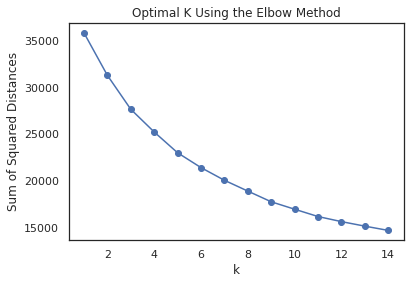

In [23]:
# K-means elbow
from sklearn.cluster import KMeans

sum_of_squared_distances = []
ks = range(1,15)
for k in ks:
    km = KMeans(n_clusters=k, max_iter=300, random_state=None)
    km.fit(city_groups_std[features_to_explore])
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(ks, sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Optimal K Using the Elbow Method')
plt.show()

In [24]:
# Silhouette Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n in range(2, 11):
    kmeans = KMeans(n_clusters=n,).fit(city_groups_std[features_to_explore])
    label = kmeans.labels_
    sil_coeff = silhouette_score(city_groups_std[features_to_explore], label, metric='euclidean')
    print(f'For n_clusters = {n}, the Silhouette coefficient is {sil_coeff}.')

For n_clusters = 2, the Silhouette coefficient is 0.2506178384893901.
For n_clusters = 3, the Silhouette coefficient is 0.26509761927747333.
For n_clusters = 4, the Silhouette coefficient is 0.26638293292048615.
For n_clusters = 5, the Silhouette coefficient is 0.26133558415729397.
For n_clusters = 6, the Silhouette coefficient is 0.2740891297919897.
For n_clusters = 7, the Silhouette coefficient is 0.15436020398899042.
For n_clusters = 8, the Silhouette coefficient is 0.1592245418332162.
For n_clusters = 9, the Silhouette coefficient is 0.1657888219979428.
For n_clusters = 10, the Silhouette coefficient is 0.16963331050936153.


In [25]:
# K = 4 is the highest but 3 is used after seeing plot below
km = KMeans(n_clusters=3, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

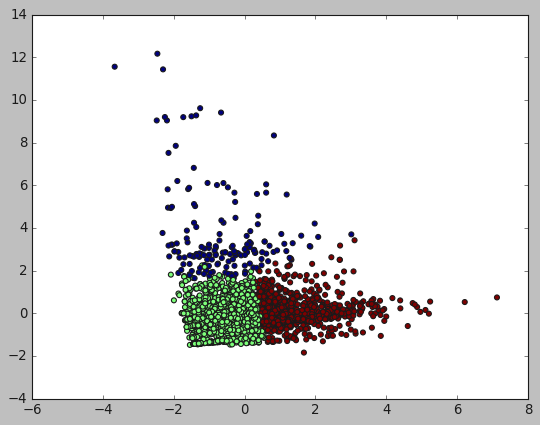

In [26]:
# Principal Components Analysis for visualization
# https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
import matplotlib.style
plt.style.use('classic')

pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(city_groups[features_to_explore])
city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()

In [27]:
# Merge city_groups and city_groups_std on user_location_city
city_groups.merge(city_groups_std[['user_location_city', 'cluster']]).groupby('cluster').mean()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
cluster,,,,,,,,,
0,28950.239130,5.358341,104.360117,3265.593915,0.112024,0.483722,2.017898,0.323054,1.071230
1,28063.573579,2.827800,43.392254,1390.075840,0.137081,0.188452,1.992531,0.375777,1.069522
2,30924.491018,3.056986,56.080539,1538.951343,0.114970,0.195509,4.084431,0.564271,2.409780


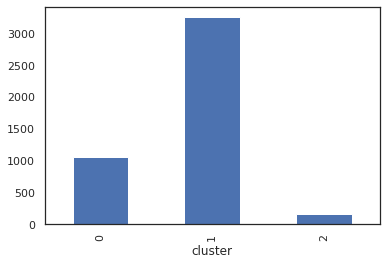

In [28]:
# Plot cluster counts
city_groups_std.groupby('cluster')['user_location_city'].agg('count').plot(kind='bar')